# ICD-9 cod


In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import missingno
import os
import glob

from __future__ import print_function

#import psycopg2
import datetime
import sys
from operator import itemgetter, attrgetter, methodcaller
import numpy as np
import itertools
import os.path
import matplotlib.pyplot as plt
import math
from multiprocessing import Pool, cpu_count

#from utils import getConnection
import polars as pl
%matplotlib inline

In [4]:

#fiñtrado
#df = pl.read_parquet("/Users/cgarciay/Desktop/Laval_Master_Computer/research/df_filtered.parquet")

df = pl.read_parquet("df_non_filtered.parquet")

In [5]:
df.shape

(58976, 60)

### Comprobación que es procedures

In [6]:
df_filtered

NameError: name 'df_filtered' is not defined

In [8]:
d1 = '/Users/cgarciay/Desktop/Laval_Master_Computer/research/MIMIC//PROCEDURES_ICD.csv.gz'
d2 = '/Users/cgarciay/Desktop/Laval_Master_Computer/research/ids_complete.csv'
ids = pl.read_csv(d2)

df_ = pl.read_csv(d1)
df_filtered = df_.filter(pl.col('SUBJECT_ID').is_in( ids["0"]))

df_filtered = df_filtered.with_columns(pl.col("SUBJECT_ID").cast(pl.Utf8))
df_filtered = df_filtered.with_columns(pl.col("HADM_ID").cast(pl.Utf8))

aux =  pl.read_csv(di,infer_schema_length=0
                      )
#merge
aux = aux.with_columns(pl.col("HADM_ID").cast(pl.Utf8))
aux = aux.groupby(['SUBJECT_ID','HADM_ID'], maintain_order=True).all()
#NOTA  SE ELIMIA ICUSTARY_ID del archivo 'dataset/ICUSTAYS.csv.gz' ya que esta duplicado"ICUSTAY_ID"
aux = aux.select(pl.exclude("ROW_ID"))
df_filtered=df_filtered.join(aux, on=['SUBJECT_ID','HADM_ID'], how="left")

                      
                      


In [13]:
aux.shape

(52243, 4)

In [3]:
d1 = '/Users/cgarciay/Desktop/Laval_Master_Computer/research/MIMIC//PROCEDURES_ICD.csv.gz'
d2 = '/Users/cgarciay/Desktop/Laval_Master_Computer/research/ids_complete.csv'

ids = pl.read_csv(d2)

df_ = pl.read_csv(d1,infer_schema_length=0
                      )
df_filtered = df_.filter(pl.col('SUBJECT_ID').is_in( ids["0"]))
#df_filtered = df_filtered.with_columns(pl.col(["HADM_ID","SUBJECT_ID"]).cast(pl.Utf8))


## Acotar df

In [4]:
aux = df_filtered[[
 'SUBJECT_ID',
 'HADM_ID',
 
 'ICD9_CODE']].to_pandas()

In [15]:
#comprobacion
aux2 = aux.groupby(['SUBJECT_ID','HADM_ID'])["ICD9_CODE"].count().reset_index()
aux2[aux2["ICD9_CODE"].notnull()]["SUBJECT_ID"].nunique()
ids["0"].to_pandas().nunique()

46520

In [17]:
aux.shape

(240095, 3)

In [20]:
nuevo_df = aux.dropna()
icd9codes = list(nuevo_df["ICD9_CODE"])

In [19]:
aux.shape

(240095, 3)

# CLINICAL CLASSIFICATIONS SOFTWARE (CCS) FOR ICD-9-CM

**Authority**
The Clinical Classifications Software (CCS) for ICD-9-CM was developed and is maintained by the Healthcare Cost and Utilization Project (HCUP), which is sponsored by the Agency for Healthcare Research and Quality (AHRQ).

**Purpose**
CCS is used to analyze costs, usage, and outcomes associated with patient diagnoses and procedures.

**Description**
CCS is composed of diagnoses and procedures categories, which are organized in two related classification systems. The single-level system consists of 285 mutually-exclusive diagnosis categories, 231 mutually-exclusive procedure categories, and no hierarchical structure. The multi-level system uses the single-level categories and International Classification of Diseases, 9th Revision, Clinical Modification (ICD-9-CM) codes in a hierarchical system consisting of four levels for diagnoses and three levels for procedures.

Developed at the Agency for Healthcare Research and Quality (AHRQ), the Clinical Classifications Software (CCS) is a tool for clustering patient diagnoses and procedures into a manageable number of clinically meaningful categories. CCS offers researchers the ability to group conditions and procedures without having to sort through thousands of codes. This "clinical grouper" makes it easier to quickly understand patterns of diagnoses and procedures so that health plans, policy makers, and researchers can analyze costs, utilization, and outcomes associated with particular illnesses and procedures.

C

CCS categories can be employed in many types of projects analyzing data on diagnoses and procedures.  For example, they can be used to:  ♦ Identify cases for disease-specific or procedure-specific studies ♦ Gain a better understanding of an institution's or health plan's distribution of patients across disease or procedure groupings ♦ Provide statistical information on characteristics, such as charges and length of stay, about relatively specific conditions ♦ Cross-classify procedures by diagnoses to provide insight into the variety of procedures performed for particular diagnoses. 

https://hcup-us.ahrq.gov/toolssoftware/chronic/chronic.jsp#files

In [21]:
icd9codes = list(nuevo_df["ICD9_CODE"])

In [22]:
from collections import Counter

In [23]:
element_types = [type(item) for item in icd9codes]
Counter(element_types)

Counter({str: 240095})

Diagnosis Codes The single-level diagnosis classification scheme aggregates illnesses and conditions into 285 mutually exclusive categories, most of which are clinically homogeneous.  Some heterogeneous categories were necessary; these combine several less common individual conditions within a body system. 

In [24]:
from icdmappings import Mapper
#icd9codes = ['29410', '5362', 'NOT_A_CODE', '3669']
mapper = Mapper()
# icd9 to ccs
#ICD9Chapters:


In [28]:
nuevo_df["CCS CODES"]  =  mapper.map(icd9codes, mapper='icd9toccs')


In [33]:
nuevo_df

,SUBJECT_ID,HADM_ID,ICD9_CODE,CCS CODES_,CCS CODES
0,62641,154460,3404,None,None
1,2592,130856,9671,242,242
2,2592,130856,3893,None,None
3,55357,119355,9672,242,242
4,55357,119355,0331,3,3
...,...,...,...,...,...
240090,67415,150871,3736,90,90
240091,67415,150871,3893,None,None
240092,67415,150871,8872,236,236
240093,67415,150871,3893,None,None


In [29]:
nuevo_df["CCS CODES"].isnull().sum()

137614

In [31]:
137614/len(nuevo_df["CCS CODES"])

0.5731647889377122

In [43]:
nuevo_df["CCS CODES"].nunique()

136

In [66]:
ccs = pd.read_csv("/Users/cgarciay/Desktop/Laval_Master_Computer/research/$prref 2015.csv")
ccs["CCS CODES"] = ccs["'CCS CATEGORY'"].replace(r'\s+', '', regex=True)
ccs.head()

,'ICD-9-CM CODE','CCS CATEGORY','CCS CATEGORY DESCRIPTION','ICD-9-CM CODE DESCRIPTION',CCS CODES
0,' ','0 ','No PROC ',INVALID CODES IN USER DATA,'0'
1,'0101 ','1 ','Inc/exc CNS ',CISTERNAL PUNCTURE,'1'
2,'0109 ','1 ','Inc/exc CNS ',CRANIAL PUNCTURE NEC,'1'
3,'0121 ','1 ','Inc/exc CNS ',CRANIAL SINUS I & D,'1'
4,'0122 ','1 ','Inc/exc CNS ',REMOV INTRACRAN STIMULAT,'1'


In [69]:
ccs["ICD9_CODE"]= ccs["'ICD-9-CM CODE'"].str.replace(r'[^0-9]', '', regex=True)



In [70]:

resultado_inner_join = pd.merge(nuevo_df[["SUBJECT_ID","HADM_ID","ICD9_CODE"]], ccs, on="ICD9_CODE", how='inner')


In [71]:
nuevo_df = resultado_inner_join.copy()

In [73]:
nuevo_df.head()

,SUBJECT_ID,HADM_ID,ICD9_CODE,'ICD-9-CM CODE','CCS CATEGORY','CCS CATEGORY DESCRIPTION','ICD-9-CM CODE DESCRIPTION',CCS CODES
0,62641,154460,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39'
1,11143,101985,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39'
2,9736,160259,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39'
3,7546,147476,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39'
4,65535,178280,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39'


In [74]:
nuevo_df.shape

(240095, 8)

In [75]:
aux.shape

(240095, 3)

In [407]:
#procedures
#ccs = pd.read_csv("$prref 2015.csv")

#ccs["CCS CODES"] = ccs["'CCS CATEGORY'"].replace(r'\s+', '', regex=True)


In [76]:
nuevo_df["CCS CODES"].nunique()

221

In [77]:
nuevo_df["CCS CODES"].isnull().sum()

0

In [78]:

import plotly.express as px
result = nuevo_df.groupby([ "'CCS CATEGORY DESCRIPTION'"]).size().reset_index(name='Count')
result = result.sort_values(by ="Count", ascending=False )


In [79]:
result

,'CCS CATEGORY DESCRIPTION',Count
105,'Mech ventil ',28983
158,'Ot vasc cath ',21548
26,'Cardiac cath ',15804
63,'Ent nutritio ',13544
13,'Blood transf ',10827
...,...,...
78,'Glaucoma prs ',2
52,'Dx procs ear ',2
207,'Varic vein ',1
90,'Inject esop ',1


In [80]:

fig = px.bar(result[:50], x="'CCS CATEGORY DESCRIPTION'", y="Count", title='CCS Proc')

# Mostrar el gráfico
fig.show()

# LEVEL 3 MAPPER

In [81]:
from icdmappings import Mapper
#icd9codes = ['29410', '5362', 'NOT_A_CODE', '3669']
mapper = Mapper()
# icd9 to ccs
#ICD9Chapters:


In [82]:
nuevo_df["LEVE3 CODES"]  =  mapper.map(icd9codes, mapper='icd9tolevel3')


In [83]:
nuevo_df["LEVE3 CODES"].nunique()

668

In [84]:
nuevo_df["LEVE3 CODES"].isnull().sum()

0

In [85]:
nuevo_df["LEVE3 CODES"]

0         340
1         967
2         389
3         967
4         033
         ... 
240090    373
240091    389
240092    887
240093    389
240094    372
Name: LEVE3 CODES, Length: 240095, dtype: object

### 3 digits category, each category graph the distribution of the code to have a granular division, (unique codes of subject_id)

Enfermedades mas frecuentes

### Merge con los nombres de diagnosis

In [86]:
dict_ = pl.read_csv("/Users/cgarciay/Desktop/Laval_Master_Computer/research/MIMIC//D_ICD_PROCEDURES.csv.gz" ,infer_schema_length=0)
#'dataset/DIAGNOSES_ICD.csv.gz'

In [87]:
dict_ = dict_.to_pandas()

In [88]:
dict_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       3882 non-null   object
 1   ICD9_CODE    3882 non-null   object
 2   SHORT_TITLE  3882 non-null   object
 3   LONG_TITLE   3882 non-null   object
dtypes: object(4)
memory usage: 121.4+ KB


In [89]:
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240095 entries, 0 to 240094
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   SUBJECT_ID                   240095 non-null  object
 1   HADM_ID                      240095 non-null  object
 2   ICD9_CODE                    240095 non-null  object
 3   'ICD-9-CM CODE'              240095 non-null  object
 4   'CCS CATEGORY'               240095 non-null  object
 5   'CCS CATEGORY DESCRIPTION'   240095 non-null  object
 6   'ICD-9-CM CODE DESCRIPTION'  240095 non-null  object
 7   CCS CODES                    240095 non-null  object
 8   LEVE3 CODES                  240095 non-null  object
dtypes: object(9)
memory usage: 18.3+ MB


In [90]:
nom_df=nuevo_df.merge(dict_, on='ICD9_CODE', how="left")

In [91]:
nom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240095 entries, 0 to 240094
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   SUBJECT_ID                   240095 non-null  object
 1   HADM_ID                      240095 non-null  object
 2   ICD9_CODE                    240095 non-null  object
 3   'ICD-9-CM CODE'              240095 non-null  object
 4   'CCS CATEGORY'               240095 non-null  object
 5   'CCS CATEGORY DESCRIPTION'   240095 non-null  object
 6   'ICD-9-CM CODE DESCRIPTION'  240095 non-null  object
 7   CCS CODES                    240095 non-null  object
 8   LEVE3 CODES                  240095 non-null  object
 9   ROW_ID                       237948 non-null  object
 10  SHORT_TITLE                  237948 non-null  object
 11  LONG_TITLE                   237948 non-null  object
dtypes: object(12)
memory usage: 23.8+ MB


In [139]:
nom_df.SHORT_TITLE.nunique()

1511

In [92]:
import plotly.express as px
result = nom_df.groupby([ "SHORT_TITLE"]).size().reset_index(name='Count')
result = result.sort_values(by ="Count", ascending=False )

fig = px.bar(result[:30], x="SHORT_TITLE", y="Count", title='CCS Proc')

# Mostrar el gráfico
fig.show()

#### Top ICD 9 codes based on "subject_id" count

# Appear min count times

### Plot the cumulative function of ICDE-9 codes in the histograms and fix a threshold for the

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample ICD-9 codes (replace this with your actual data)


def cumulative_plot(icd9_codes, num_bins,threshold_value,cat):
    # Create a DataFrame with ICD-9 codes and their frequencies
    icd9_df = pd.DataFrame(icd9_codes, columns=['ICD-9 Code'])
    icd9_df['Frequency'] = icd9_df['ICD-9 Code'].map(icd9_df['ICD-9 Code'].value_counts())
    icd9_df= icd9_df.sort_values(by='Frequency', ascending=False)

    # Drop duplicate rows to get unique ICD-9 codes and their frequencies
    unique_icd9_df = icd9_df.drop_duplicates().sort_values(by='Frequency', ascending=False)

    # Calculate cumulative frequency percentage
    unique_icd9_df['Cumulative Frequency'] = unique_icd9_df['Frequency'].cumsum()
    total_frequency = unique_icd9_df['Cumulative Frequency'].iloc[-1]
    unique_icd9_df['Cumulative F percentage'] = unique_icd9_df['Cumulative Frequency'] / total_frequency

    # Create the plot using Matplotlib
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

    # Histogram with fewer bins
      # Adjust the number of bins
    n, bins, patches = ax1.hist(icd9_df['ICD-9 Code'], bins=num_bins, color='blue', alpha=0.7)
    ax1.set_xlabel('ICD-9 Codes')
    ax1.set_ylabel('Frequency', color='blue')

    # Add a vertical dashed line at the threshold value

    threshold_x_value = unique_icd9_df[unique_icd9_df["Cumulative F percentage"] >= threshold_value].sort_values(by="Cumulative F percentage", ascending=False).iloc[-1]['ICD-9 Code']
    
    bins_before_threshold = unique_icd9_df[unique_icd9_df["Cumulative F percentage"] < threshold_value].sort_values(by="Cumulative F percentage", ascending=False)['ICD-9 Code'].nunique()
    bins_before_threshold_i = unique_icd9_df[unique_icd9_df["Cumulative F percentage"] < threshold_value].sort_values(by="Cumulative F percentage", ascending=False)['ICD-9 Code'].unique()

        
    ax1.axvline(x=threshold_x_value, color='red', linestyle='--', linewidth=2, label='Threshold: ' + str(threshold_value) )
    ax1.annotate(f'{bins_before_threshold} Bins Before Threshold', xy=(threshold_x_value, 0), xytext=(10, 20), textcoords='offset points', fontsize=10, color='red')

        
    
    #percentage = count / total_frequency * 100
    #ax1.annotate(f'\n{i}', xy=(bins[i] + (bins[i+1] - bins[i])/2, count), ha='center', va='bottom', fontsize=10)
        #ax1.annotate(f'{int(count)}', xy=(bins[i] + (bins[i+1] - bins[i])/2, count), ha='center', va='bottom', fontsize=10, )

    # Customize the plot
    ax1.set_title('Histogram of:' +str(cat))
    ax1.legend(loc='upper right')



    # Create a secondary y-axis for cumulative frequency
    ax2 = ax1.twinx()
    ax2.plot(unique_icd9_df['ICD-9 Code'], unique_icd9_df['Cumulative F percentage'], color='green', label='Cumulative Frequency')
    ax2.set_ylabel('Cumulative Frequency', color='green')
    ax2.legend(loc='upper right')

    legend_position = (1, .2)  # Adjust the position as needed
    ax1.legend(loc='upper right', bbox_to_anchor=legend_position)
    ax2.legend(loc='lower right', bbox_to_anchor=legend_position)

    # Hide x-axis tick labels
    ax1.set_xticks([])

    # Show the plot
    plt.tight_layout()  # Adjust layout for labels
    plt.show()
    return bins_before_threshold,bins_before_threshold_i

In [14]:
nuevo_df["ICD9_CODE"].nunique()

1526

In [94]:
thresh = [.88,.98,.95,.999]

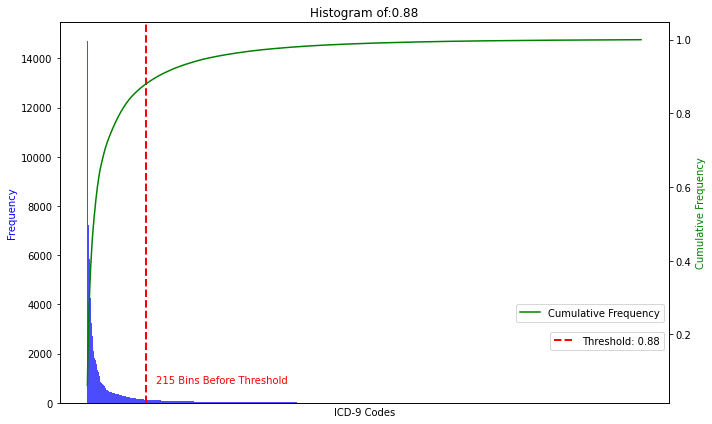

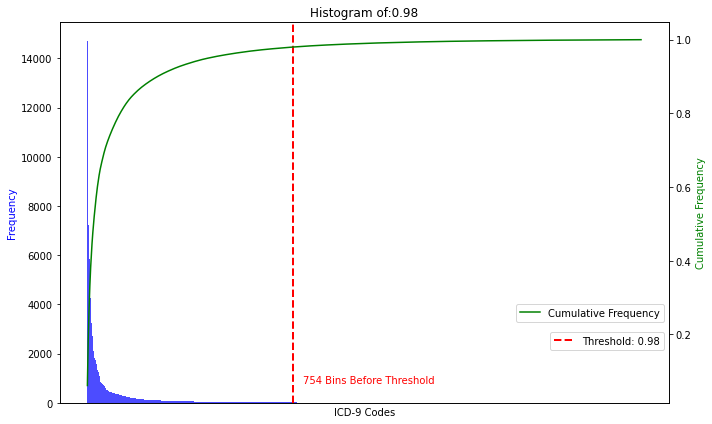

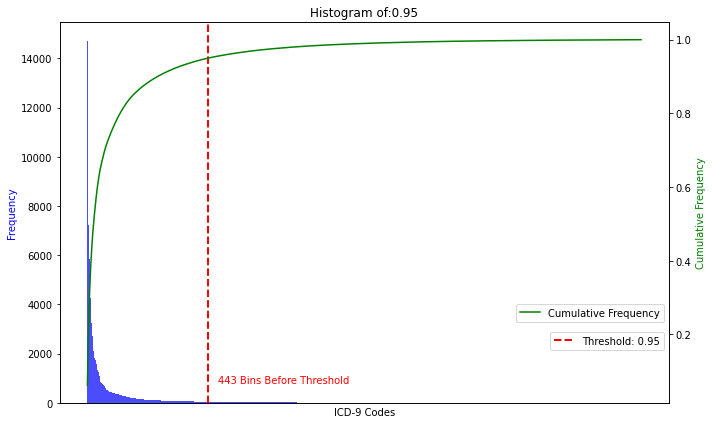

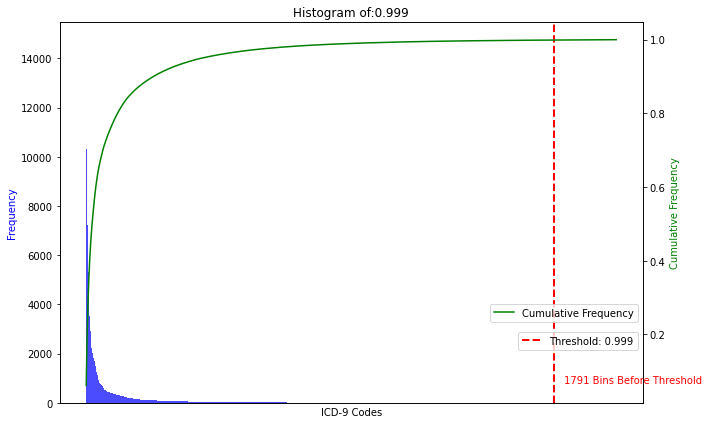

In [95]:
bins_before_threshold = []
bins_before_threshold_index = []
num_bins = len(nuevo_df["ICD9_CODE"].unique())
icd9_codes = list(nuevo_df["ICD9_CODE"])
for i in thresh:
    a,b = cumulative_plot(icd9_codes, num_bins,i,i)
    bins_before_threshold.append(a)
    bins_before_threshold_index.extend(list(b))


### Se agrega al DF

In [112]:
len(bins_before_threshold_index)

443

In [113]:
len(icd9_codes)

240095

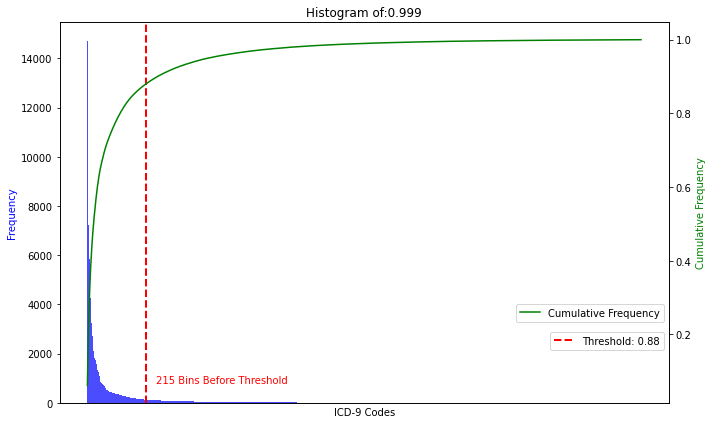

In [123]:
bins_before_threshold = []
bins_before_threshold_index = []
num_bins = len(nuevo_df["ICD9_CODE"].unique())
icd9_codes = list(nuevo_df["ICD9_CODE"])

a,b = cumulative_plot(icd9_codes, num_bins,.88,i)
bins_before_threshold.append(a)
bins_before_threshold_index.extend(list(b))

In [124]:
def asignar_valor(series, lista_especifica):
    # Usamos una comprensión de lista para asignar "Otro" a los valores que no están en la lista
    nueva_serie = series.apply(lambda x: x if x in lista_especifica else -1)
    return nueva_serie

# Ejemplo de una serie y una lista específica
serie_original = nuevo_df["ICD9_CODE"]
lista_especifica = bins_before_threshold_index

# Llama a la función para asignar valores

serie_modificada = asignar_valor(serie_original, lista_especifica)

# Muestra la serie modificada
print(serie_modificada)

0         3404
1         3404
2         3404
3         3404
4         3404
          ... 
240090      -1
240091      -1
240092      -1
240093      -1
240094      -1
Name: ICD9_CODE, Length: 240095, dtype: object


In [125]:
print(serie_modificada.nunique())
print(serie_modificada.value_counts())
len(bins_before_threshold_index)

216
-1      28928
3893    14731
9604    10333
966      9300
9671     9100
        ...  
3492      133
3951      132
8099      132
5012      132
4823      129
Name: ICD9_CODE, Length: 216, dtype: int64


215

In [126]:
nuevo_df["cat_threshold .88 most frequent"]= serie_modificada

In [127]:
nuevo_df

,SUBJECT_ID,HADM_ID,ICD9_CODE,'ICD-9-CM CODE','CCS CATEGORY','CCS CATEGORY DESCRIPTION','ICD-9-CM CODE DESCRIPTION',CCS CODES,LEVE3 CODES,cat_threshold .999 most frequent,cat_threshold .95 most frequent,cat_threshold .98 most frequent,cat_threshold .88 most frequent
0,62641,154460,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39',340,3404,3404,3404,3404
1,11143,101985,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39',967,3404,3404,3404,3404
2,9736,160259,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39',389,3404,3404,3404,3404
3,7546,147476,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39',967,3404,3404,3404,3404
4,65535,178280,3404,'3404 ','39 ','Thoracentesi ',INSERT INTERCOSTAL CATH,'39',033,3404,3404,3404,3404
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240090,57215,181872,8690,'8690 ','175','OR Rx skin ',Ext fat for grft/banking (Begin 2010),'175',373,-1,-1,-1,-1
240091,70131,146957,8235,'8235 ','160','Rx prs musc ',HAND FASCIECTOMY NEC,'160',389,8235,-1,-1,-1
240092,70131,146957,8235,'8235 ','160','Rx prs musc ',HAND FASCIECTOMY NEC,'160',887,8235,-1,-1,-1
240093,40548,168670,0693,'0693 ','12 ','Ot Rx endoc ',THYROID SUTURE,'12',389,-1,-1,-1,-1


In [128]:
nuevo_df[nuevo_df["cat_threshold .88 most frequent"]==-1].shape

(28928, 13)

In [122]:
nuevo_df[nuevo_df["cat_threshold .999 most frequent"]==-1].shape

(241, 12)

In [40]:
aux.shape

(81755, 3)

In [129]:
#nuevo_df.to_csv("procedures_preprocess.csv")
nuevo_df.to_csv("procedures_preprocess_threshold_nonfiltered.csv")